In [40]:
import unicodecsv


enrollments_filename = r'E:\Github\docs123\Udacity\DataAna\dataset\enrollments.csv'

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open(enrollments_filename, 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    print(enrollments[0])
    
### Write code similar to the above to load the engagement
### and submission data. The data is stored in files with
### the given filenames. Then print the first row of each
### table to make sure that your code works. You can use the
### "Test Run" button to see the output of your code.

engagement_filename = r'E:\Github\docs123\Udacity\DataAna\dataset\daily_engagement.csv'
submissions_filename = r'E:\Github\docs123\Udacity\DataAna\dataset\project_submissions.csv'

with open(engagement_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    print(daily_engagement[0])

with open(submissions_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    print(project_submissions[0])
    
# daily_engagement = None     # Replace this with your code
# project_submissions = None  # Replace this with your code

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [41]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
print(enrollments[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


In [42]:
# Clean up the data types in the engagement table
for engagement_record in list(daily_engagement):
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [43]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [44]:
int(1.5)

1

In [45]:
int(float(1.5))

1

In [46]:
# list(daily_engagement)[0]
print(type(daily_engagement[0]))
# print(daily_engagement[])
for k in daily_engagement:
    k['account_key']=k['acct']
    del(k['acct'])
print(daily_engagement[0:10][0]['utc_date'])

<class 'collections.OrderedDict'>
2015-01-09 00:00:00


In [47]:
daily_engagement[0:5]
s=set()
for k in daily_engagement:
    
#     print(k)
      s.add(k['account_key'])
print(len(s))

1237


In [48]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [49]:
s1=set()
for k in enrollments:
    
#     print(k)
      s1.add(k['account_key'])
print(len(s1))

1302


In [50]:
c=0
for k in enrollments:
    student=k['account_key']
    if student not in s:
        print(k)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [51]:
c=0
for k in enrollments:
    student=k['account_key']
    if student not in s and k['join_date'] != k['cancel_date']:
        print(k)
        c+=1
print(c)
        

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


('is_udacity', True) , True these are udacity test accounts

In [52]:
udacity_test_acc=set()
for ele in enrollments:
    if ele['is_udacity']:
        udacity_test_acc.add(ele['account_key'])
len(udacity_test_acc)

6

In [53]:
def remove_testuda_acc(data):
    non_uda_acc=[]
    for ele in data:
        if ele['account_key'] not in udacity_test_acc:
            non_uda_acc.append(ele)
    return non_uda_acc

In [54]:
print(len(enrollments),':',len(daily_engagement),':',len(project_submissions))
non_uda_enroll=remove_testuda_acc(enrollments)
non_uda_engagement=remove_testuda_acc(daily_engagement)
non_uda_submissions=remove_testuda_acc(project_submissions)

print(len(non_uda_enroll))
print(len(non_uda_engagement))
print(len(non_uda_submissions))




1640 : 136240 : 3642
1622
135656
3634


In [55]:
# days_to_cancel=None
# days_to_cancel>7

paid_students={}

for ele in non_uda_enroll:
#     print(ele)
#     break
    if not ele['is_canceled']  or ele['days_to_cancel']>7:
        acc_key=ele['account_key']
        enroll_date=ele['join_date']
        if acc_key not in paid_students or \
        enroll_date > paid_students[acc_key]:
            paid_students[acc_key]=enroll_date

len(paid_students)               
        

995

In [56]:
non_uda_engagement[:3]

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.2848873333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 53.6337463333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')])]

In [57]:
# paid_students

In [58]:
def within_one_week(join_date,engagment_date):
    time_delta=engagment_date-join_date
    return time_delta.days<7 and time_delta.days>=0
    

In [59]:
def rem_free_trial(data):
    new_data=[]
    for d_point in data:
        if d_point['account_key'] in paid_students:
            new_data.append(d_point)
    return new_data

In [60]:
paid_enrollments=rem_free_trial(non_uda_enroll)
paid_engagements=rem_free_trial(non_uda_engagement)
paid_submissions=rem_free_trial(non_uda_submissions)

print(len(paid_enrollments),len(paid_engagements),len(paid_submissions))

# non_uda_enroll=remove_testuda_acc(enrollments)
# non_uda_engagement=remove_testuda_acc(daily_engagement)
# non_uda_submissions=remove_testuda_acc(project_submissions)

1293 134549 3618


In [61]:
for engagement_record in paid_engagements:
    if engagement_record['num_courses_visited']>0:
        engagement_record['has_visited']=1
    else:
        engagement_record['has_visited']=0

In [62]:
paid_engagement_in_first_week=[]
for engagement in paid_engagements:
    acc_key=engagement['account_key']
    join_date=paid_students[acc_key]
    engagement_date=engagement['utc_date']
    
    if within_one_week(join_date,engagement_date):
        paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

In [63]:
from collections import defaultdict

engament_by_acc=defaultdict(list)

for ele in paid_engagement_in_first_week:
    acc_key=ele['account_key']
    engament_by_acc[acc_key].append(ele)

def group_data(data,field):
    data_by_f=defaultdict(list)
    for ele in data:
        acc_key=ele['account_key']
        data_by_f[acc_key].append(ele)
    return data_by_f

    


In [64]:
engament_by_acc['1292']

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 7, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 22.1842831666),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '1292'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 8, 0, 0)),
              ('num_courses_visited', 0),
              ('total_minutes_visited', 0.0),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '1292'),
              ('has_visited', 0)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 3.01193883333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '1292'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1,

In [65]:

total_min_by_acc={}
total_lessons={}

for acc_key,engagement_for_student in engament_by_acc.items():
    total_min=0
    total_lesson=0
    for engagement_rec in engagement_for_student:
        total_min+=engagement_rec['total_minutes_visited']
        total_lesson+=engagement_rec['lessons_completed']
    total_min_by_acc[acc_key]=total_min
    total_lessons[acc_key]=total_lesson


In [66]:
def sum_grouped_items(data,field):
    total_d={}
    for acc_key,engagement_for_student in data.items():
        total=0
        for rec in engagement_for_student:
            total+=rec[field]
            # total_lesson+=engagement_rec['lessons_completed']
        total_d[acc_key]=total
    return total_d
    # total_lessons[acc_key]=total_lesson
sum_grouped_items(engament_by_acc,'total_minutes_visited')

if total_min_by_acc==sum_grouped_items(engament_by_acc,'total_minutes_visited'):
    print(True)

True


In [67]:
total_minutes=list(total_min_by_acc.values())
total_lessons_l=list(total_lessons.values())
print(total_minutes[:6])
total_lessons_l[:5]

[494.88049616599994, 18.576384666670002, 0.0, 0.0, 33.3214046667, 329.7578566663]


[1, 0, 0, 0, 0]

In [68]:
import numpy as np

max_total=np.max(total_minutes)
print('Mean :',np.mean(total_minutes))
print('Std Deviation :',np.std(total_minutes))
print('Max :',np.max(total_minutes))
print('Min :',np.min(total_minutes))
print('-------Below is lessons description------')
print('Mean :',np.mean(total_lessons_l))
print('Std Deviation :',np.std(total_lessons_l))
print('Max :',np.max(total_lessons_l))
print('Min :',np.min(total_lessons_l))

Mean : 306.70832675342825
Std Deviation : 412.99693340852957
Max : 3564.7332644989997
Min : 0.0
-------Below is lessons description------
Mean : 1.636180904522613
Std Deviation : 3.002561299829423
Max : 36
Min : 0


In [69]:
import numpy as np
def describe_data(d):
    data=list(d.values())
    print('Mean :',np.mean(data))
    print('Std Deviation :',np.std(data))
    print('Max :',np.max(data))
    print('Min :',np.min(data))



In [70]:
max_acc_id=0
key=0
for k,v in total_min_by_acc.items():
    if v == max_total:
        key=k
        print(k,':',max_total)
        
engament_by_acc[key]
    


163 : 3564.7332644989997


[OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)),
              ('num_courses_visited', 4),
              ('total_minutes_visited', 850.519339666),
              ('lessons_completed', 4),
              ('projects_completed', 0),
              ('account_key', '163'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)),
              ('num_courses_visited', 6),
              ('total_minutes_visited', 872.633923334),
              ('lessons_completed', 6),
              ('projects_completed', 0),
              ('account_key', '163'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 777.018903666),
              ('lessons_completed', 6),
              ('projects_completed', 0),
              ('account_key', '163'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime

In [71]:
days_visited_by_account = sum_grouped_items(engament_by_acc,'has_visited')

describe_data(days_visited_by_account)

Mean : 2.8673366834170855
Std Deviation : 2.2551980029196814
Max : 7
Min : 0


In [72]:
# video 21
# 3176718735
# subway_project_lesson_keys = ['746169184', '3176718735']

print(paid_engagement_in_first_week[:3])
print(paid_submissions[:10])

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])]
[OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')]), OrderedDict([('creation_date', datetime.datetime(2015

In [73]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project=set()

for submission in paid_submissions:
    project=submission['lesson_key']
    rating=submission['assigned_rating']

    if project in subway_project_lesson_keys and rating in ['PASSED','DISTINCTION']:
        pass_subway_project.add(submission['account_key'])
len(pass_subway_project)


647

In [74]:
passing_engagement = []
non_passing_engagement = []

# paid_engagement_in_first_week

for ele in paid_engagement_in_first_week:
    if ele['account_key'] in pass_subway_project:
        passing_engagement.append(ele)
    else:
        non_passing_engagement.append(ele)
print(len(passing_engagement),':',len(non_passing_engagement))

# passing_engagement


4527 : 2392


In [75]:
passing_engagement[:3]

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.2848873333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 53.6337463333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0'),
              ('has_visited', 1)])]

In [76]:
# Video 22
passing_enagagement_by_account= group_data(passing_engagement,'account_key')
non_passing_engagement_by_account=group_data(non_passing_engagement,'account_key')

In [77]:
non_passing_minutes =sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')

describe_data(non_passing_minutes)

Mean : 143.32647426675584
Std Deviation : 269.5386190114951
Max : 1768.5227493319999
Min : 0.0


In [78]:
passing_minutes =sum_grouped_items(passing_enagagement_by_account,'total_minutes_visited')
describe_data(passing_minutes)

Mean : 394.58604648350865
Std Deviation : 448.4995193265521
Max : 3564.7332644989997
Min : 0.0


(array([3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

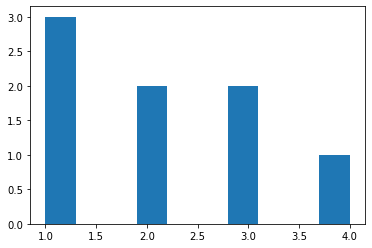

In [81]:
# 23

data = [1, 2, 1, 3, 3, 1, 4, 2]

# %matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

In [84]:
plt.show()